In [7]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as signal
import math
import matplotlib.image as mpimg
import sys
sys.path.append('/home/twubi/deep-image-prior/Frames/sources/')
from solver import solver
import os
from tool import *
#fname = '/home/twubi/deep-image-prior/Frames/images/im64.png'
image_name = 'barbara'
fname = os.path.join('/home/twubi/deep-image-prior/Frames/images/',image_name+'.png')
Image = mpimg.imread(fname=fname)
sigma = 20/255 #for im64
#sigma = 20/255
D = Image.shape[0] 
noisy_img = (Image + sigma*np.random.randn(D, D)); 	# add noise
noisy_img[noisy_img > 1] = 1; 
noisy_img[noisy_img < 0]   = 0; 

## Input 
#image g 
solver_setting = {
    'iteration_num': 400,
    'num_filter': 16*16,  # Replace with the actual value
    'kernel_size': 16,  # Replace with the actual value
    'Lambda': 3.4 * sigma  # Replace with the actual value

}

output_setting = {
    'verbose': False,  # Replace with the actual value
    'output_interval': 10,  # Replace with the actual value
    'path_output': '/home/twubi/deep-image-prior/Frames/output2/'
}

## Output
image_filename = f"denoised_image.png"  # 图片文件名，根据迭代次数进行命名
output_folder = output_setting['path_output']
image_filepath = os.path.join(output_folder, 'image')
filters_filename = f"filters.npy"
filters_filepath = os.path.join(output_folder, 'data')
for path in [output_folder,image_filepath,filters_filepath]:
    if not os.path.exists(path):
        os.makedirs(path)



g = noisy_img.copy()
#A = solver(g,Image,solver_setting,output_setting)
A = np.zeros((16*16,16,16))
np.save(os.path.join(filters_filepath, filters_filename), A)


V_coded = np.zeros((solver_setting['num_filter'],D,D))
denoise_image = W_synthesis(A,thresholding(2.7 * sigma,W_analysis(A,g,V_coded)),g)
plt.imshow(denoise_image, cmap='gray')
plt.title(f'Denoised Image (Snr: {snr(Image - denoise_image, Image)})')
plt.axis('off')
plt.savefig(os.path.join(image_filepath, image_filename))
plt.close()






In [ ]:
def vector_to_square2(V_flat_mat,V_coded): # V_codes change!
    # A = np.zeros((num_filter,r,r))  #2D r by r
    # A_flat_mat = np.zeros((r_2,num_filter))
    num_filter = V_coded.shape[0]
    r = V_coded.shape[1] #or D
    r_2 = r*r #or N = D*D
    # for i in range(num_filter):
    #     V_coded[i,:,:] = V_flat_mat[:,i].reshape((r,r))
    V_coded = np.transpose(V_flat_mat.reshape((r,r,num_filter)),(2,0,1))

In [12]:
import time
print('Finish solving at' + str(time.ctime(time.time()))) 

Finish solving atWed Dec 20 01:12:08 2023


In [13]:
print('Finish sythesis and denoising at'+str(time.ctime(time.time())))

Finish sythesis and denoising atWed Dec 20 01:13:51 2023


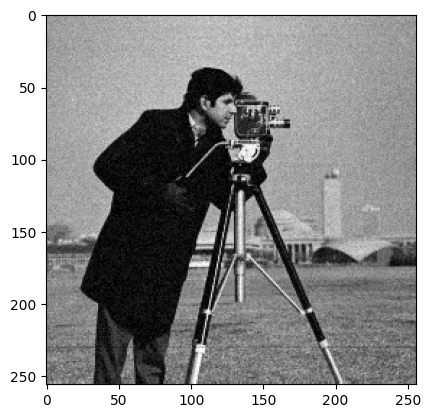

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as signal
import math
import matplotlib.image as mpimg
import sys
sys.path.append('/home/twubi/deep-image-prior/Frames/sources/')
from solver import solver
import os
from tool import *
import time

image_name = 'cameraman'
fname = os.path.join('/home/twubi/deep-image-prior/Frames/images/',image_name+'.png')
#fname = os.path.join('/home/twubi/deep-image-prior/Frames/images/',image_name+'.png')
Image = mpimg.imread(fname=fname)
sigma = 10/255 #for im64
#sigma = 20/255
D = Image.shape[0] 
np.random.seed(42)
noisy_img = (Image + sigma*np.random.randn(D, D)); 	# add noise
noisy_img[noisy_img > 1] = 1; 
noisy_img[noisy_img < 0]   = 0; 

plt.imshow(noisy_img, cmap='gray')

In [19]:
g = noisy_img.copy()
g1 = W_synthesis(A,thresholding(0,W_analysis(A,g,V_coded)),g)
print(snr(g1-Image,Image))

ValueError: operands could not be broadcast together with shapes (512,512) (256,256) 

In [17]:
A

array([[[0.125, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]],

       [[0.   , 0.125, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]],

       [[0.   , 0.   , 0.125, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as signal
import math
import matplotlib.image as mpimg
import sys
sys.path.append('/home/twubi/deep-image-prior/Frames/sources/')
from solver import solver
import os
from tool import *

str(0.1) + "err.png"

'0.1err.png'